# Vasanth Mani Vasi

### Downloading the dataset

In [1]:
!gdown 1xkynpL15pt6KT3YSlDimu4A5iRU9qYck
!unzip -q Flowers-Dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1xkynpL15pt6KT3YSlDimu4A5iRU9qYck
To: /content/Flowers-Dataset.zip
100% 236M/236M [00:03<00:00, 61.3MB/s]


In [2]:
!ls flowers

daisy  dandelion  rose	sunflower  tulip


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### Data Augmentation

In [4]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 64

train_ds = keras.preprocessing.image_dataset_from_directory(
    'flowers',
    subset='training',
    validation_split=0.2,
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    'flowers',
    subset='validation',
    validation_split=0.2,
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

preprocessing = keras.Sequential([
    keras.layers.Rescaling(1./255)
])

augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomContrast(0.1)
])

# Applying the augmentations
augmented_train_ds = train_ds.map(
    lambda x, y: (preprocessing(x), y)
).map(
    lambda x, y: (augmentation(x), y)
).prefetch(buffer_size=64) # prefetching for performance

val_dataset = val_ds.map(
    lambda x, y: (preprocessing(x), y)
).prefetch(buffer_size=64) # prefetching for performance

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


### Model Building

In [5]:
model = keras.Sequential([
    keras.layers.Input(shape=(256, 256, 3)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPooling2D((2,2)),  
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

### Model Compilation

In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

### Model Fitting

In [7]:
history = model.fit(
    augmented_train_ds,
    validation_data=val_ds,
    steps_per_epoch=(3454 // 64) + 1,
    validation_steps=(863 // 64) + 1,
    epochs=50
)

Epoch 1/50
54/54 [==============================] - 65s 1s/step - loss: 1.4671 - accuracy: 0.3205 - val_loss: 1.3415 - val_accuracy: 0.3917
Epoch 2/50
54/54 [==============================] - 57s 1s/step - loss: 1.2307 - accuracy: 0.4858 - val_loss: 1.3761 - val_accuracy: 0.3824
Epoch 3/50
54/54 [==============================] - 57s 1s/step - loss: 1.1769 - accuracy: 0.4948 - val_loss: 1.1914 - val_accuracy: 0.4647
Epoch 4/50
54/54 [==============================] - 58s 1s/step - loss: 1.1240 - accuracy: 0.5371 - val_loss: 1.1124 - val_accuracy: 0.5562
Epoch 5/50
54/54 [==============================] - 58s 1s/step - loss: 1.0772 - accuracy: 0.5599 - val_loss: 1.0844 - val_accuracy: 0.5736
Epoch 6/50
54/54 [==============================] - 58s 1s/step - loss: 1.0528 - accuracy: 0.5880 - val_loss: 1.0700 - val_accuracy: 0.5840
Epoch 7/50
54/54 [==============================] - 58s 1s/step - loss: 1.0240 - accuracy: 0.5964 - val_loss: 1.0391 - val_accuracy: 0.6072
Epoch 8/50
54/54 [==

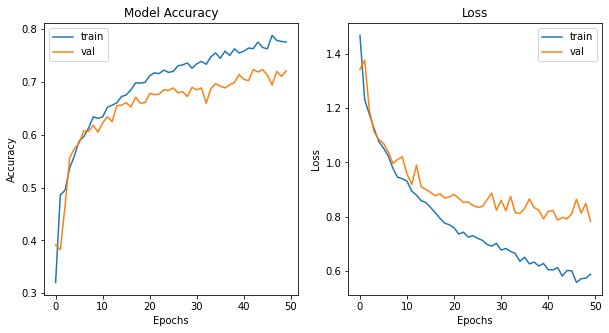

In [8]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')

ax = plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

### Saving the Model

In [9]:
model.save('flower classifier.h5')

### Testing the Model

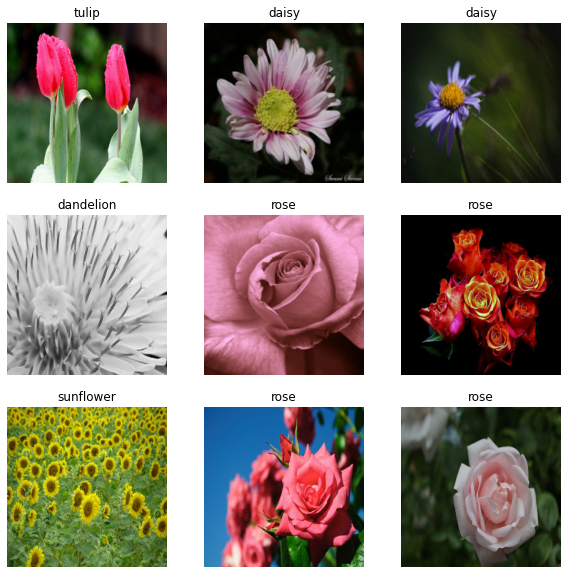

In [10]:
model = tf.keras.models.load_model('flower classifier.h5')
sample_images, labels = next(val_ds.take(1).as_numpy_iterator())

y_pred = model.predict(sample_images)
y_pred = np.argmax(y_pred, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].astype("uint8"))
    plt.title(val_ds.class_names[y_pred[i]])
    plt.axis("off")